In [1]:
# 📓 Feature Engineering Notebook for DevOps Learners

# ---
# 🧪 Imports
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# ---
# 📥 Load Cleaned Data
df = pd.read_csv("../data/processed/cleaned_kubestronaut_predictor_data.csv")
df.head()


,final_result,theory_hours,lab_hours,number_full_exam_done,cncf_try_numbers,location,born_year,selfassessment
0,0.245754,1527,1600,2.0,1.5,Suburb,1956,Good
1,0.502498,2526,2600,3.0,2.5,Downtown,1998,Excellent
2,0.069930,1622,1800,2.0,1.5,Rural,1975,Fair
3,0.212787,1835,1900,2.0,2.0,Urban,1982,Good
4,0.151848,1742,1800,2.0,1.5,Suburb,1963,Good


In [2]:
# ---
# 🔍 3. Initial Data Exploration

# Print dataset shape: rows × columns
print("Dataset shape (colums, rows):", df.shape)

# Print summary of column names, types, null counts, etc.
df.info()

# Show basic stats (mean, min, max, std) for numeric columns
df.describe()

# ---
# 🧠 Why this matters:
# This gives a quick overview of the data:
#  Are there missing values?
#  What kind of columns are there (numeric, text)?
#  Do the values look reasonable?n


Dataset shape (colums, rows): (69, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   final_result           69 non-null     float64
 1   theory_hours           69 non-null     int64  
 2   lab_hours              69 non-null     int64  
 3   number_full_exam_done  69 non-null     float64
 4   cncf_try_numbers       69 non-null     float64
 5   location               69 non-null     object 
 6   born_year              69 non-null     int64  
 7   selfassessment         69 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 4.4+ KB


,final_result,theory_hours,lab_hours,number_full_exam_done,cncf_try_numbers,born_year
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.232058,1945.565217,2075.985507,2.543478,1.869565,1976.028986
std,0.166337,397.764987,381.026805,0.553990,0.482428,15.831810
min,0.000000,1350.000000,1500.000000,2.000000,1.000000,1947.000000
25%,0.098901,1650.000000,1800.000000,2.000000,1.500000,1963.000000
50%,0.225774,1835.000000,2000.000000,3.000000,2.000000,1978.000000
75%,0.325674,2150.000000,2200.000000,3.000000,2.000000,1990.000000
max,0.732268,2980.000000,3000.000000,4.000000,3.000000,2010.000000


In [3]:
# ---
# 🎯 Feature Engineering (Human-Readable)

# Feature 1: Age of the kubestronaut
df['kubestronaut_age'] = datetime.now().year - df['born_year']

# Feature 2: Price per square foot
df['final_result_per_theory_hours'] = df['final_result'] / df['theory_hours']

# Feature 3: Ratio of bedrooms to bathrooms
df['number_full_exam_done_cncf_try_numbers_ratio'] = df['number_full_exam_done'] / df['cncf_try_numbers']

# Handle division by zero and infinite values
df['number_full_exam_done_cncf_try_numbers_ratio'] = df['number_full_exam_done_cncf_try_numbers_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 📊 Quick Look at Engineered Data
df[['kubestronaut_age', 'final_result_per_theory_hours', 'number_full_exam_done_cncf_try_numbers_ratio']].describe()


,kubestronaut_age,final_result_per_theory_hours,number_full_exam_done_cncf_try_numbers_ratio
count,69.000000,69.000000,69.000000
mean,48.971014,0.000108,1.402657
std,15.831810,0.000060,0.269161
min,15.000000,0.000000,1.000000
25%,35.000000,0.000058,1.200000
50%,47.000000,0.000118,1.333333
75%,62.000000,0.000151,1.500000
max,78.000000,0.000246,2.000000


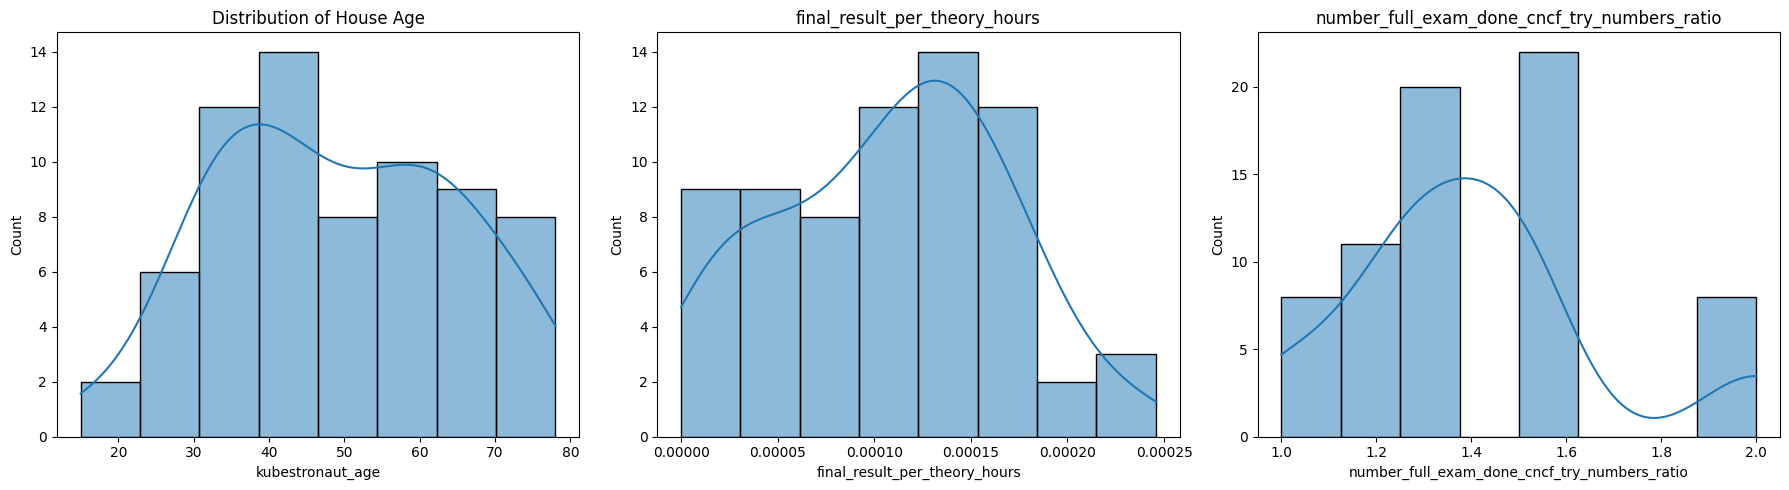

In [4]:
# 📊 5. Visualize the New Features

# Plot distributions of the new features to check if they make sense

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['kubestronaut_age'], kde=True, ax=axs[0])
axs[0].set_title('Distribution of House Age')

sns.histplot(df['final_result_per_theory_hours'], kde=True, ax=axs[1])
axs[1].set_title('final_result_per_theory_hours')

sns.histplot(df['number_full_exam_done_cncf_try_numbers_ratio'], kde=True, ax=axs[2])
axs[2].set_title('number_full_exam_done_cncf_try_numbers_ratio')

plt.tight_layout()
plt.show()


In [5]:
# 💾 Save Final Engineered Features (Human-Readable CSV)

selected_columns = [
    'final_result', 'theory_hours', 'lab_hours', 'number_full_exam_done', 'cncf_try_numbers', 'location', 'born_year', 'selfassessment',
    'kubestronaut_age', 'final_result_per_theory_hours', 'number_full_exam_done_cncf_try_numbers_ratio'
]

df[selected_columns].to_csv("../data/processed/data_scientists_features.csv", index=False)
print("✅ Saved human-readable engineered features to ../data/processed/data_scientists_features.csv")


✅ Saved human-readable engineered features to ../data/processed/data_scientists_features.csv


In [6]:
# ✅ 8. Summary
# We:
# - Created domain-informed features: kubestronaut_age, results_per_theory, number_fullexam_done_vs_cncf_real_exam_ratio
# - Explored and visualized them
# - Built a preprocessing pipeline using sklearn
# - Saved the preprocessed data and pipeline for downstream ML tasks

# 👨‍🔬 This notebook represents the **data scientist/MLE workflow** for feature engineering,
# before these steps are automated via a script like `engineer.py` for production.

# 📦 Next step: Experimentation to find out the right Algorithm and its Configurations (Hyperparameters)!
